# Подготовка и изучение датасета

### Загружаем библиотеки 

In [1]:
from pandas import read_csv , DataFrame 
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.naive_bayes import BernoulliNB
import numpy as np
import scipy.spatial
from math import pi,exp
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

### Загрузка датасета и первичный анализ

In [2]:
dataset=read_csv('dataset.csv')

Выводим первые строки

In [3]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,58.0,College,T,20.0,0.0,F,F,F,207.0,110.0,80.0,23.55,78.0,78.0,0
1,F,49.0,College,F,0.0,0.0,F,T,F,239.0,143.0,93.0,28.38,75.0,87.0,0
2,F,59.0,School,F,0.0,1.0,F,T,F,234.0,181.0,107.0,39.40,80.0,90.0,1
3,M,36.0,other,F,0.0,0.0,F,F,F,194.0,117.0,90.0,27.08,73.0,87.0,0
4,F,60.0,University,F,0.0,0.0,F,F,F,328.0,127.0,70.0,22.36,75.0,63.0,1


Смотрим размерность


In [4]:
dataset.shape

(4238, 16)

Выводим информацию и описание датасета

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   object 
 1   age              3814 non-null   float64
 2   education        3716 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(1), object(6)
memory usage: 529.9+ KB


In [6]:
dataset.describe()

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3814.000000,4209.000000,4185.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,49.524646,9.003089,0.029630,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,8.568405,11.920094,0.169584,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,32.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


###  Смотрим частотности некотрых столбцов и проверяем на наличие нулевых/пустых значений 


In [7]:
#проверяем наличие пропусков, если отличается от 0, то пропуски есть 
dataset['male'].isnull().sum()

0

In [8]:
#Частота полов 
dataset['male'].value_counts()

F    2419
M    1819
Name: male, dtype: int64

In [9]:
#проверяем наличие пропусков, если отличается от 0, то пропуски есть 
dataset['age'].isnull().sum()

424

In [10]:
#Пропуски в education
dataset['education'].isnull().sum()

522

In [11]:
#Частота в EDUCATION
dataset['education'].value_counts()

School        1551
College       1125
University     616
other          424
Name: education, dtype: int64

In [12]:
#Пропуски в currentSmoker
dataset['currentSmoker'].isnull().sum()

0

In [13]:
#Частота в currentSmoker
dataset['currentSmoker'].value_counts()

F    2144
T    2094
Name: currentSmoker, dtype: int64

In [14]:
#Пропуски в cigsPerDay
dataset['cigsPerDay'].isnull().sum()

29

In [15]:
#Частота в cigsPerDay
dataset['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
23.0       6
50.0       6
11.0       5
16.0       3
45.0       3
13.0       3
12.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [16]:
#Пропуски в BPMeds
dataset['BPMeds'].isnull().sum()

53

In [17]:
#Частота в BPMeds
dataset['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [18]:
#Пропуски в prevalentStroke
dataset['prevalentStroke'].isnull().sum()

0

In [19]:
#Частота в prevalentStroke
dataset['prevalentStroke'].value_counts()

F    4213
T      25
Name: prevalentStroke, dtype: int64

In [20]:
#Пропуски в prevalentHyp
dataset['prevalentHyp'].isnull().sum()

0

In [21]:
#Частота в prevalentHyp
dataset['prevalentHyp'].value_counts()

F    2922
T    1316
Name: prevalentHyp, dtype: int64

In [22]:
#Пропуски в diabetes
dataset['diabetes'].isnull().sum()

0

In [23]:
#Частота в diabetes
dataset['diabetes'].value_counts()

F    4129
T     109
Name: diabetes, dtype: int64

In [24]:
#Пропуски в totChol
dataset['totChol'].isnull().sum()

50

In [25]:
#Частота в totChol
dataset['totChol'].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
347.0     1
367.0     1
359.0     1
353.0     1
365.0     1
Name: totChol, Length: 248, dtype: int64

In [26]:
#Пропуски в sysBP
dataset['sysBP'].isnull().sum()

0

In [27]:
#Частота в sysBP
dataset['sysBP'].value_counts()

120.0    107
130.0    102
110.0     96
115.0     89
125.0     88
        ... 
295.0      1
194.0      1
212.0      1
244.0      1
230.0      1
Name: sysBP, Length: 234, dtype: int64

In [28]:
#Пропуски в diaBP
dataset['diaBP'].isnull().sum()

0

In [29]:
#Частота в diaBP
dataset['diaBP'].value_counts()

80.0     262
82.0     152
85.0     137
70.0     135
81.0     131
        ... 
53.0       1
60.5       1
129.0      1
110.5      1
142.5      1
Name: diaBP, Length: 146, dtype: int64

In [30]:
#Пропуски в BMI
dataset['BMI'].isnull().sum()

19

In [31]:
#Частота в BMI
dataset['BMI'].value_counts()

22.19    18
23.48    18
22.54    18
22.91    18
25.09    16
         ..
19.12     1
23.70     1
29.49     1
20.78     1
19.00     1
Name: BMI, Length: 1363, dtype: int64

In [32]:
#Пропуски в heartRate
dataset['heartRate'].isnull().sum()

1

In [33]:
#Частота в heartRate
dataset['heartRate'].value_counts()

75.0     563
80.0     385
70.0     305
60.0     231
85.0     227
        ... 
130.0      1
140.0      1
51.0       1
47.0       1
97.0       1
Name: heartRate, Length: 73, dtype: int64

In [34]:
#Пропуски в glucose
dataset['glucose'].isnull().sum()

388

In [35]:
#Частота в glucose
dataset['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
70.0     152
80.0     152
        ... 
297.0      1
193.0      1
191.0      1
235.0      1
270.0      1
Name: glucose, Length: 143, dtype: int64

### Описание столбцов датасата
- Sex:пол
- Age: возраст. F - Ж, M - М
- CurrentSmoker: Курить ли . T- курит, F - не курит
- CigsPerDay: если курит, то сколько сигарет в день, если не курит, то будет стоять 0
- BPMeds: принимал ли пациент лекарства от артериального давления 1 - да, 0 - нет
- PrevalentStroke: был ли у пациента ранее инсульт, T - да, F - нет
- PrevalentHyp:наличие у пациента гипертонии, T - да, F - нет
 - Diabetes: был ли у пациента диабет, T - да, F - нет
- TotChol: уровень общего холестерина 
- SysBP: истолическое артериальное давление
- DiaBP: диастолическое артериальное давление
- BMI: Индекс массы тела
- HeartRate: частота сердечных сокращений 
- Glucose: уровень глюкозы
- TenYearCHD - будет ли у человека в течении 10 лет ишемическая болезнь сердца, 0 - нет, 1 - да(целевая переменная)

### Выводы из первичного анализа данных
- В данных есть пропуски. В действиетельных признакаках пропуски заменяем средне выборочным. В категориальных и бинарных  признаках пропуски заменяем медианами
- В данных есть бинарные и категориальные признаки. Бинарные кодируем как T = 1, F = 0. В случае Категориальных используем one-hot-encoding.

## Преобразования признаков исходя из выводов и визуализация распределений

### Преобразования

In [36]:
# Заполняем пропуски в  бинарных и категориальных данных
from scipy.stats import mode
for i in ['education', 'BPMeds']:
    dataset[i].fillna(mode(dataset[i]).mode[0], inplace=True)

In [37]:
# Заполняем пропуски в  действительных даннх 
for i in ['age','cigsPerDay', 'totChol','BMI','heartRate','glucose']:
    dataset[i].fillna(np.mean(dataset[i]), inplace=True)

In [38]:
#функция преобразующая пол 
def priobr_sex(sex):
    if sex=='M':
        return 1
    elif sex=='F':
        return 0
    
dataset['male'] = dataset['male'].apply(priobr_sex)
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58.0,College,T,20.0,0.0,F,F,F,207.0,110.0,80.0,23.55,78.0,78.0,0
1,0,49.0,College,F,0.0,0.0,F,T,F,239.0,143.0,93.0,28.38,75.0,87.0,0
2,0,59.0,School,F,0.0,1.0,F,T,F,234.0,181.0,107.0,39.40,80.0,90.0,1
3,1,36.0,other,F,0.0,0.0,F,F,F,194.0,117.0,90.0,27.08,73.0,87.0,0
4,0,60.0,University,F,0.0,0.0,F,F,F,328.0,127.0,70.0,22.36,75.0,63.0,1


In [39]:
#Приобразуем бинарные данные
def priobr_binar(x):
    if x == 'T':
        return 1
    else:
        return 0
for i in ['currentSmoker', 'prevalentStroke', 'prevalentHyp', 'prevalentHyp', 'diabetes' ]:
    dataset[i] = dataset[i].agg(priobr_binar)
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58.0,College,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
1,0,49.0,College,0,0.0,0.0,0,0,0,239.0,143.0,93.0,28.38,75.0,87.0,0
2,0,59.0,School,0,0.0,1.0,0,0,0,234.0,181.0,107.0,39.40,80.0,90.0,1
3,1,36.0,other,0,0.0,0.0,0,0,0,194.0,117.0,90.0,27.08,73.0,87.0,0
4,0,60.0,University,0,0.0,0.0,0,0,0,328.0,127.0,70.0,22.36,75.0,63.0,1


In [40]:
def to_int(x):
    return int(x)

In [41]:
# Делаем one hot encoding и приравниаем к int, потому что реализация sklearn возвращает категории почему -то в float 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(dataset['education'].to_frame())
result = encoder.transform(dataset['education'].to_frame())
for i in range(len(encoder.categories_[0])):
    
    dataset[encoder.categories_[0][i]] = result[:,i]
    dataset[encoder.categories_[0][i]] = dataset[encoder.categories_[0][i]].agg(to_int)

    
# education Удалим после визуального анализа
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,College,School,University,other
0,1,58.0,College,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0,1,0,0,0
1,0,49.0,College,0,0.0,0.0,0,0,0,239.0,143.0,93.0,28.38,75.0,87.0,0,1,0,0,0
2,0,59.0,School,0,0.0,1.0,0,0,0,234.0,181.0,107.0,39.40,80.0,90.0,1,0,1,0,0
3,1,36.0,other,0,0.0,0.0,0,0,0,194.0,117.0,90.0,27.08,73.0,87.0,0,0,0,0,1
4,0,60.0,University,0,0.0,0.0,0,0,0,328.0,127.0,70.0,22.36,75.0,63.0,1,0,0,1,0


### Визуализации

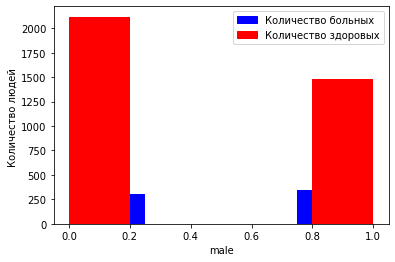

In [42]:
#Распределение наличия  ишемической болезни сердца по полу
plt.xlabel('male')
plt.ylabel('Количество людей ')
plt.hist(x=dataset[dataset['TenYearCHD']==1]['male'], bins=4,color='blue')
plt.hist(x=dataset[dataset['TenYearCHD']==0]['male'], bins=5,color='red')
vern = mpatches.Patch(color='blue', label='Количество больных ')
ne_vern = mpatches.Patch(color='red', label='Количество здоровых' )
plt.legend(handles=[vern,ne_vern])

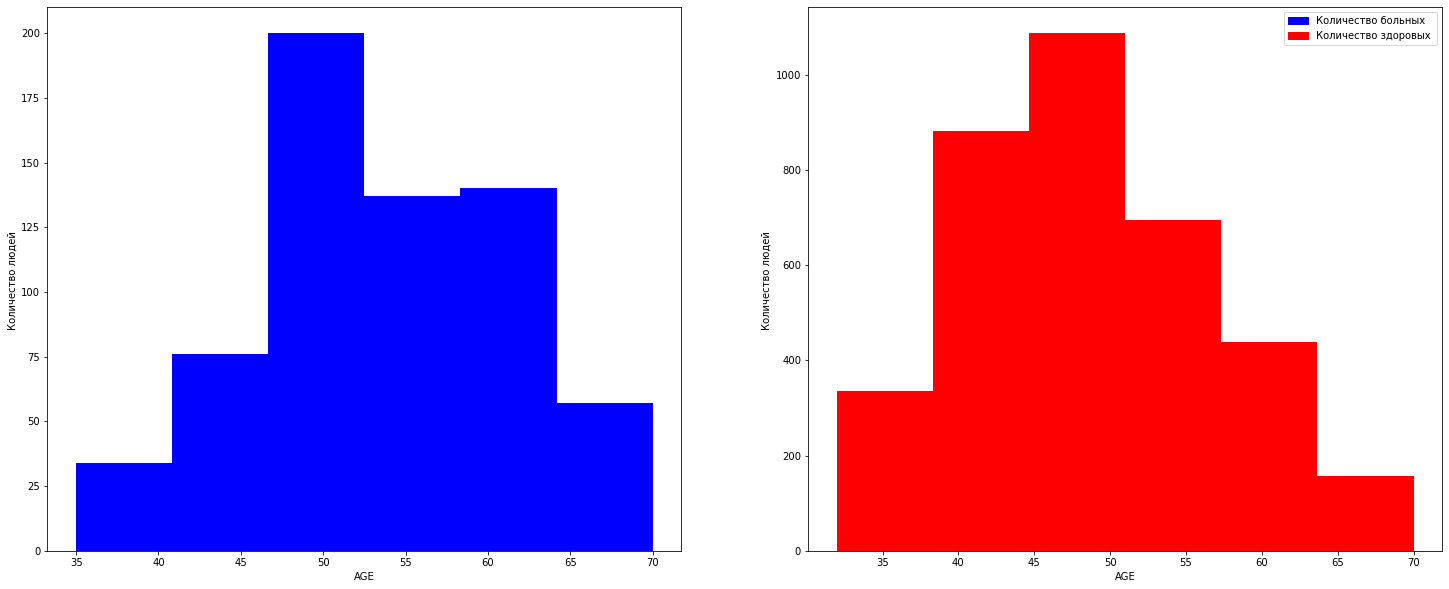

In [43]:
#Распределение наличия  ишемической болезни сердца по возрастам 
fig = plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['TenYearCHD']==1]['age'], bins=6,color='blue')
plt.xlabel('AGE')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['TenYearCHD']==0]['age'], bins=6,color='red')
plt.xlabel('AGE')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество больных  ')
ne_vern = mpatches.Patch(color='red', label='Количество здоровых ')
plt.legend(handles=[vern,ne_vern])

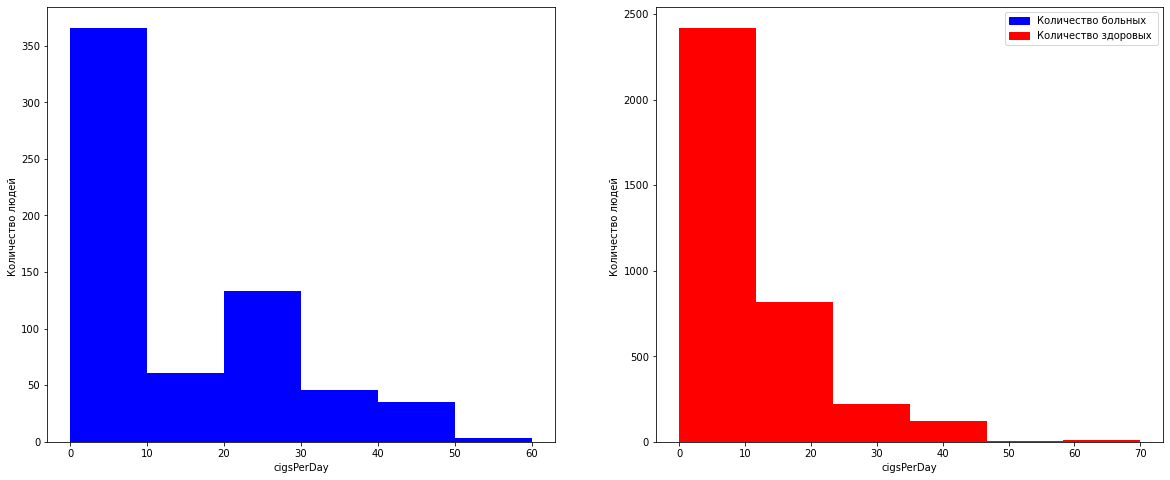

In [44]:
#Распределение наличия  ишемической болезни сердца по количеству выкуренных сигарет
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['TenYearCHD']==1]['cigsPerDay'], bins=6,color='blue')
plt.xlabel('cigsPerDay')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['TenYearCHD']==0]['cigsPerDay'], bins=6,color='red')
plt.xlabel('cigsPerDay')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество больных  ')
ne_vern = mpatches.Patch(color='red', label='Количество здоровых ')
plt.legend(handles=[vern,ne_vern])

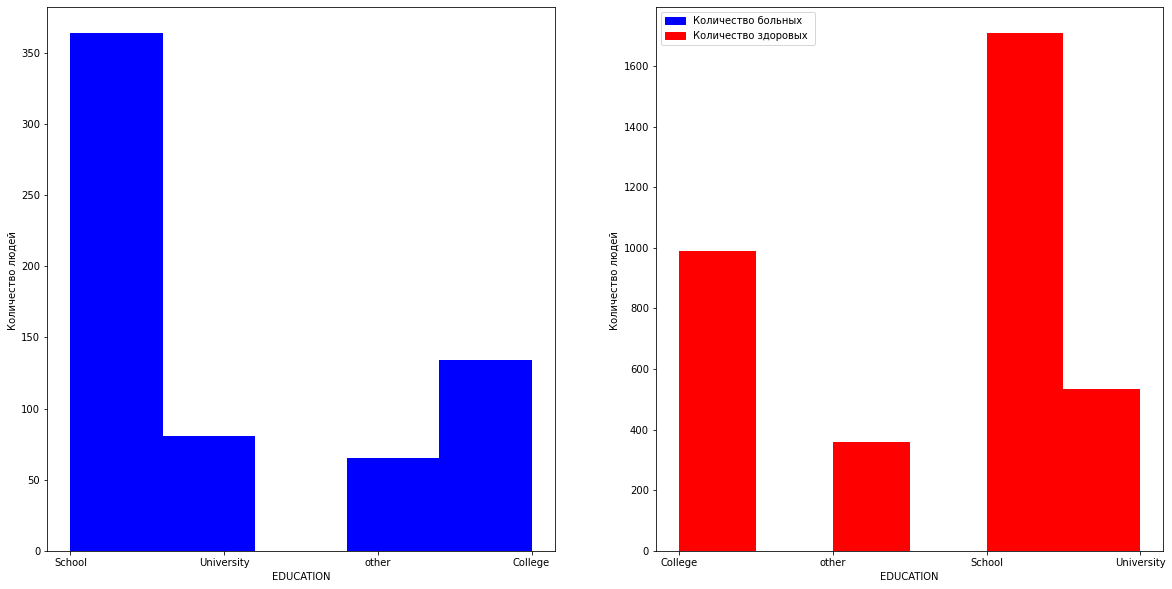

In [45]:
#Распределение наличия  ишемической болезни сердца по образованию
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['TenYearCHD']==1]['education'], bins=5,color='blue')
plt.xlabel('EDUCATION')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['TenYearCHD']==0]['education'], bins=6,color='red')
plt.xlabel('EDUCATION')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество больных  ')
ne_vern = mpatches.Patch(color='red', label='Количество здоровых ')
plt.legend(handles=[vern,ne_vern])

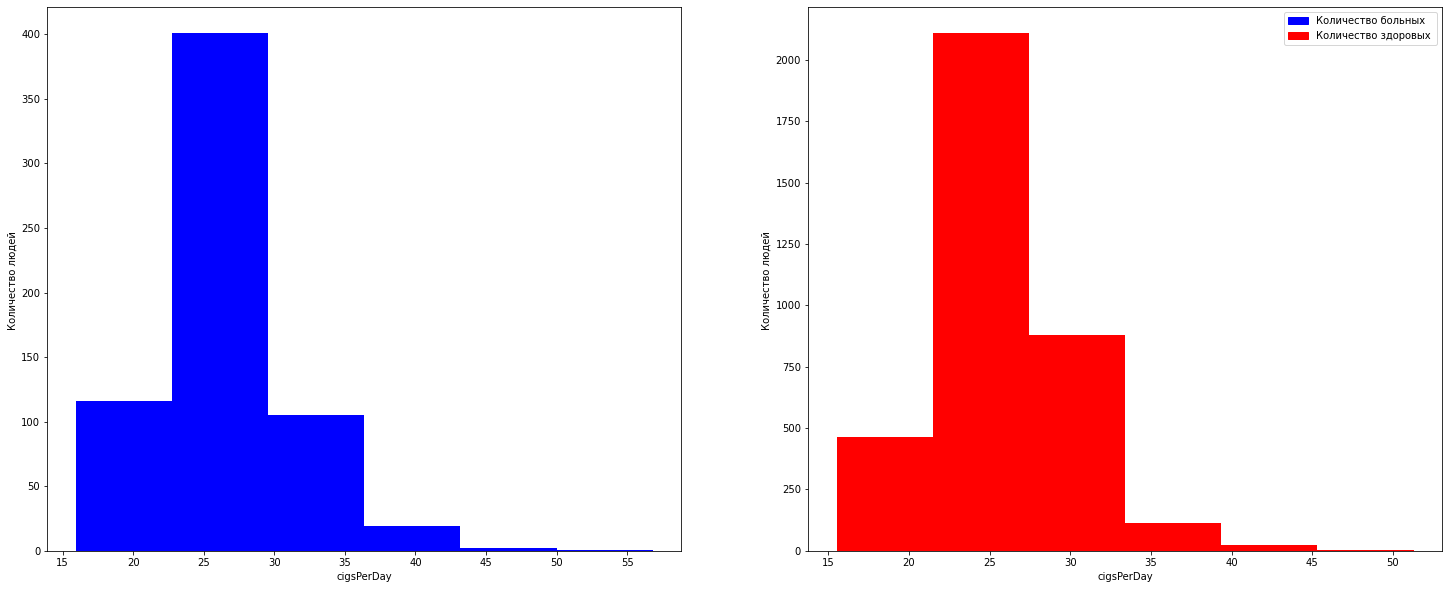

In [46]:
#Распределение наличия  ишемической болезни сердца по индексу массы 
fig = plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['TenYearCHD']==1]['BMI'], bins=6,color='blue')
plt.xlabel('cigsPerDay')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['TenYearCHD']==0]['BMI'], bins=6,color='red')
plt.xlabel('cigsPerDay')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество больных  ')
ne_vern = mpatches.Patch(color='red', label='Количество здоровых ')
plt.legend(handles=[vern,ne_vern])

## Выводы по визуализации
- По распределению по полам, можно сказать, что мужчины чуть чаще болеют ишемической болезни сердца, но при это женщин почти в 2 раза больше чем мужчинв выборке, потому можно сделать вывод, что это небольшая разница количеством больных среди женщин и мужчин вызвана бОльшим количеством женщин.
- Чаще всего люди болеют в возрсте 45-50. в возрасте 50-65 можно сказать, что болеют на 25% реже, чем в возрасте 45-50, при этом доля больных от общей доли больны значительна. От 35 до 45 люди чаще не болеют, чем болеет примерно в 2-3 раза.
- Даже курения от 0 до 1 сигареты имеет серьезные последствия для здоровья. Примерно 50-60 % Больных людей курят по 0-10 сигаретам. Второе место по вреду это 20 -30 сигарет в день. Выкуривие от  30 до 60 сигат в день повышает примерно от 3 до 6-8 раз вероятность болезни. 
- Чаще всего болеют люди имеющие только школьное образование( примерно 50% от обшего числа больных).Обучение в вузе примерно поднимает вероятность не заболеть в 4 раза. 
- Люди с инлексом массы от 20 до 25 чаще всего болеют. 

In [47]:
# удаляем MARRIAGE  и EDUCATION 
del dataset['education']

# Реализация алгоритма k ближайших соседей с использованием весов и наивного байесовского классификатора

### Фунция для подсчета метрик классификации и разделение выборки на тест и трейн

In [48]:
def metrics(pred, Y_test):
    
    
    print("Accuracy: ", (pred==Y_test).mean())
    print("Pprecision: ", precision_score(pred, Y_test, average='micro'))
    print("Recall: ", recall_score(pred, Y_test, average='micro'))
    print("F1: ", f1_score(pred, Y_test, average='micro'))


In [49]:
#разбиваю выборку на трейн и тест. Для теста выделяю 30% выборки.
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('TenYearCHD',axis=1), dataset['TenYearCHD'], test_size=0.2, random_state=42,shuffle=True)

### Наивный байесовский классификатор

In [50]:
#мой наивный байесовский классификатор реализован в виде класса NaivBaisClassificator в нем есть 2 главных публичный метода 
#fit - для обучения и predict - для предсказания , остальные методы приватные и используются в публичных.
class NaivBaisClassificator:
    
    #при инициализации мы создаем out - это словарь. Ключи этого словаря будут название фич. А значения по ключу будет 
    #датафрейм.
    #Каждый датафрейм является Likelihood Table т.е. таблицей правдоподобия. На основе этих таблиц в методе -onepredict будут
    #делаться предскания о пренадлежности объекта к классу 1 или 0
    def __init__(self):
        self.out={}
    
    #метод _make_likelihood_Table считает Likelihood Table для конкретного признака 
    def _make_likelihood_Table(self,labels_and_serie):
        a=labels_and_serie[labels_and_serie['target']==1][labels_and_serie.keys()[1]].value_counts()/len(labels_and_serie[labels_and_serie['target']==1][labels_and_serie.keys()[1]])
        b=labels_and_serie[labels_and_serie['target']==0][labels_and_serie.keys()[1]].value_counts()/len(labels_and_serie[labels_and_serie['target']==0][labels_and_serie.keys()[1]])
        out_dataframe=DataFrame()
        if set(a.keys())==set(b.keys()):
        
            out_dataframe[a.name+'_1']=a
            out_dataframe[b.name+'_0']=b
            return out_dataframe
        if len(set(a.keys())-set(b.keys()))!=0:
            for m in list(set(a.keys())-set(b.keys())):
                b[m]=1/len(labels_and_serie[labels_and_serie['target']==0][labels_and_serie.keys()[1]])
        if len(set(b.keys())-set(a.keys()))!=0:
            for m in list(set(b.keys())-set(a.keys())):
                        a[m]=1/len(labels_and_serie[labels_and_serie['target']==1][labels_and_serie.keys()[1]])
        out_dataframe[a.name+'_1']=a
        out_dataframe[b.name+'_0']=b
        return out_dataframe
    
    
    #метод fit заполняет словарь out датафреймами, которые являются Likelihood Table
    def fit(self,train,test):
        data=DataFrame()
        data=train.copy()
        data['target']=test.values
        dict_of_df={}
        for i in data.columns[0:-1]:
            dict_of_df[i]=self._make_likelihood_Table(data[['target',i]])
        self.out=dict_of_df
    
    
    #метод _onepredict делает предсказания класса для одного объекта используя словарь out 
    def _onepredict(self,test):
        zero=1
        one=1
        for i in test.keys():
            #использую отловщик ошибок, потому что возможна такая ситуация, что нет ключа в таблице на обучении, это возможно
            #если не было этого значения в обучающей выборке. Особенно это актуально для параметров являющимися действительными
            #числами. К примеру Fare. Я не удалил этот признак, потому что во первых он все-таки может быть в обуч выборке
            # во вторых он может быть полезен в других моделях
            try:
                one=one*float(self.out[i][i+'_1'][test[i]])
                zero=zero*float(self.out[i][i+'_0'][test[i]])
            except:
                one=one*1
                zero=zero*1
        if zero>one:
        
            return 0
        else:
        
            return 1
        
    #метод predict использует метод _onepredict для предсказания класса для одного объекта, при помощи цикла метод predict делает 
    #предсказания для каждлго объекта  и возвращает в итоге список меток для каждого объекта
    def predict(self,test_dataset):
        final_predict=[]
        for k in range(test_dataset.shape[0]):
            final_predict.append(self._onepredict(test_dataset.iloc[k]))
        return final_predict
    

In [51]:
#обучаю свою модель модель
my_NaivBais=NaivBaisClassificator()
my_NaivBais.fit(X_train,y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(my_NaivBais.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(my_NaivBais.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  0.6283185840707964
Pprecision:  0.6283185840707964
Recall:  0.6283185840707964
F1:  0.6283185840707964
Метрики на тестовой выборки 
Accuracy:  0.5495283018867925
Pprecision:  0.5495283018867925
Recall:  0.5495283018867925
F1:  0.5495283018867925


In [52]:
#обучаем моледь из sklearn
NaivBais=ComplementNB()
NaivBais.fit(X_train,y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(NaivBais.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(NaivBais.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  0.6212389380530974
Pprecision:  0.6212389380530974
Recall:  0.6212389380530974
F1:  0.6212389380530974
Метрики на тестовой выборки 
Accuracy:  0.6120283018867925
Pprecision:  0.6120283018867925
Recall:  0.6120283018867925
F1:  0.6120283018867925


#### Выводы по метрикам 
- Метрики на трейне у моей модели и модели из sklearn примерно одинаковые 
- мой модель более сильно переобучилась чем модель из sklearn( разница метрик на трейне и тесте 0.07 у  моей модели и 0.01 у модели из sklearn)
- Что у модели из sklearn и модели метрики примерно равны 0.6, что низко на млй взгляд, потому особо нету смысла использовать их в решении этой задачи 

### Алгоритм k ближайших соседей с использованием весов

In [53]:
#мой Метод k-ближайших соседей реализован в виде класса Knn с 2 публичными методами fit и predict. fit -нужен для обучения.
# predict для предсказания.

class KNN:
    #при инициализации в конструктор передается 2 параметра k и h. k- количство соседей , h -длинна парзеновского окна
    def __init__(self, k,h=1):
        self.h=h
        self.k = k
    
    #получаю обучающую выборку    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
   
    #метод _jadro_K является приватным. Он реализует вычисление Гауссовского ядра,используемового в парзеновском окне
    def _jadro_K(self,z):
        
        return ((2*pi)**(-0.5))*exp(-0.5*z**(2))
    #метод predict классифицирует объекты
    def predict(self, X_test):
        output = []#предсказанные метки 
        for i in range(len(X_test)):
            d = []#растояния между тестовым объектом и объектами обучающей выборки
            votes = []#метки ближайших объектов
            for j in range(len(X_train)):
                #считаем растояние 
                dist = scipy.spatial.distance.euclidean(X_train.iloc[j] , X_test.iloc[i])
                 #считается расстояние и применяется парзеновское окно с гауссовским ядром
                #для реализации весов. Чем меньше h , тем меньше мы учитываем далекие объекты
                weight=self._jadro_K(scipy.spatial.distance.euclidean(X_train.iloc[j] , X_test.iloc[i])/self.h)
                d.append([dist, j,weight])
            
            #сортируем расстояния до тестового объекта 
            d.sort()
            d = d[0:self.k]#берем k ближайших тестовых объектов
            zero_score=0
            one_score=0
            #достаем метки
            for a, j, k in d:
                votes.append(y_train.iloc[j])
            #считаем частотность 1 и 0 учитывая веса
            for j in range(len(votes)):
                if votes[j]==0:
                    zero_score=zero_score+1*d[j][2]
                if votes[j]==1:
                    one_score=one_score+1*d[j][2]
            #смотрим какого класса больше
            if zero_score>one_score:
                ans=0
            if  one_score>zero_score:
                ans=1
            output.append(ans)
        return output
    

In [54]:
#обучаю свою модель с k=5 и h=5 . Что значит,смотреть по 5  соседям и использовать парзеновское окно равное 5
my_KNN = KNN(3,5)
my_KNN.fit(X_train, y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(my_KNN.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(my_KNN.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  1.0
Pprecision:  1.0
Recall:  1.0
F1:  1.0
Метрики на тестовой выборки 
Accuracy:  0.8030660377358491
Pprecision:  0.8030660377358491
Recall:  0.8030660377358491
F1:  0.8030660377358491


In [55]:

#обучаем моледь из sklearn
sk_knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
sk_knn.fit(X_train,y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(sk_knn.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(sk_knn.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  1.0
Pprecision:  1.0
Recall:  1.0
F1:  1.0
Метрики на тестовой выборки 
Accuracy:  0.8419811320754716
Pprecision:  0.8419811320754716
Recall:  0.8419811320754716
F1:  0.8419811320754716


#### Выводы по метрикам
- Метрики на трейне и тесте моей модели и модели из sklearn равны 1. Что удивляет. Получается модели полностью описывают зависимости в выборке для обучения
- На тесте метри моей модели и модели из sklearn падают(0.85 для модели из sklearn, 0.8 у моей). Из этого следует, что наблюдается переобучение у обоих моделей
- Но несмотря на переобучение метрки у модели KNN метрики выше чем у наивного байса, что значит, что модели KNN желательнее применять в этой задаче 

### На последок запишим наш измененный датасет в файл для  использования в следующей лабораторной

In [56]:
dataset.to_csv('remastered_dataset.csv',index=False)